In [ ]:
# OLD

In [11]:
import pandas as pd
import numpy as np
from VizXpress import gsea, dott_plot
# !pip install mygene
# import mygene
import gseapy
import matplotlib.pyplot as plt

In [1]:
df = pd.read_csv('/Users/coltongarelli/Desktop/bleo paper updates/new bleo data normed counts.csv')
df.groupby('Gene Symbol', as_index=False).mean()
df.set_index('Gene Symbol', inplace=True)
df.index = df.index.str.upper()

NameError: name 'pd' is not defined

In [ ]:
df1 = df.loc[df.sum(axis=1) > 30]
df1
# df.sum(axis=1)
# 24941 rows × 24 columns
# df['MD12S06_B'].mean()
# bp = df1.add(1).apply(np.log2).boxplot()
# for tick in bp.get_xticklabels():
#     tick.set_rotation(90)
# bp
cm = plt.get_cmap('twilight_shifted')
bp = df1.add(1).apply(np.log2).plot(kind='kde', cmap=cm)
bp.set_xlim((-3,12.5))
plt.tight_layout()
# for tick in bp.get_xticklabels():
#     tick.set_rotation(90)
bp

<AxesSubplot:>

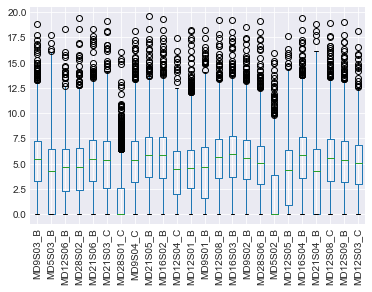

In [16]:
bp = df1.add(1).apply(np.log2).boxplot()
for tick in bp.get_xticklabels():
    tick.set_rotation(90)
bp

In [17]:
from sklearn.preprocessing import quantile_transform

In [19]:
def normalize_quantiles(M, inplace=False):
        """
        Note: replicates behavior of R function normalize.quantiles from library("preprocessCore")

        Reference:
         [1] Bolstad et al., Bioinformatics 19(2), pp. 185-193, 2003

        Adapted from https://github.com/andrewdyates/quantile_normalize
        """
        if not inplace:
            M = M.copy()

        Q = M.argsort(axis=0)
        m,n = M.shape

        # compute quantile vector
        quantiles = np.zeros(m)
        for i in range(n):
            quantiles += M[Q[:,i],i]
        quantiles = quantiles / n

        for i in range(n):
            # Get equivalence classes; unique values == 0
            dupes = np.zeros(m, dtype=np.int)
            for j in range(m-1):
                if M[Q[j,i],i]==M[Q[j+1,i],i]:
                    dupes[j+1] = dupes[j]+1

            # Replace column with quantile ranks
            M[Q[:,i],i] = quantiles

            # Average together equivalence classes
            j = m-1
            while j >= 0:
                if dupes[j] == 0:
                    j -= 1
                else:
                    idxs = Q[j-dupes[j]:j+1,i]
                    M[idxs,i] = np.median(M[idxs,i])
                    j -= 1 + dupes[j]
            assert j == -1

        if not inplace:
            return M


<AxesSubplot:>

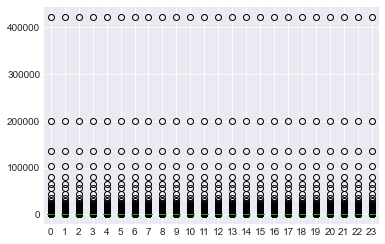

In [22]:
pd.DataFrame(normalize_quantiles(df1.to_numpy())).boxplot()

In [ ]:
pd.set_option('display.max_columns', None)
df.describe()
# MD28S01_C mean = 15.5
# MD5S02_B mean = 27.5

In [ ]:
# df.pop('MD28S01_C')
# df.pop('MD5S02_B')

In [26]:

bleo = df[[*df.columns[df.columns.str.contains('B')].to_list(),
                  *df.columns[df.columns.str.contains('C')].to_list()]]
cols = bleo.columns.str.replace('MD', 'Day')
cols = cols.str.replace('S', ' ')
cols = cols.str.replace('_B', ' Bleo')
cols = cols.str.replace('_C', ' PBS')
cols
bleo.columns = cols

In [ ]:
# mg=mygene.MyGeneInfo()
# entrez = mg.querymany(df.index.to_list(),fields='entrezgene', species='human', scopes='symbol', as_dataframe=True)



In [27]:
bleo = df[[*df.columns[df.columns.str.contains('B')].to_list(),
                  *df.columns[df.columns.str.contains('C')].to_list()]]
cols = bleo.columns.str.replace('MD', 'Day')
cols = cols.str.replace('S', ' ')
cols = cols.str.replace('_B', ' Bleo')
cols = cols.str.replace('_C', ' PBS')
bleo.columns = cols
bleo.columns

Index(['Day9 03 Bleo', 'Day5 03 Bleo', 'Day12 06 Bleo', 'Day28 02 Bleo',
       'Day21 06 Bleo', 'Day21 05 Bleo', 'Day16 02 Bleo', 'Day12 01 Bleo',
       'Day9 01 Bleo', 'Day12 08 Bleo', 'Day16 03 Bleo', 'Day9 02 Bleo',
       'Day28 06 Bleo', 'Day5 02 Bleo', 'Day12 05 Bleo', 'Day16 04 Bleo',
       'Day21 04 Bleo', 'Day12 09 Bleo', 'Day21 03 PBS', 'Day28 01 PBS',
       'Day9 04 PBS', 'Day12 04 PBS', 'Day12 08 PBS', 'Day12 03 PBS'],
      dtype='object')

In [30]:
bleo = df[[*df.columns[df.columns.str.contains('B')].to_list(),
                  *df.columns[df.columns.str.contains('C')].to_list()]]
d5 = bleo[[*bleo.columns[bleo.columns.str.contains('Day5')].to_list()]]
d5 = d5[[*d5.columns[d5.columns.str.contains('Bleo')].to_list(),
                  *d5.columns[d5.columns.str.contains('PBS')].to_list()]]
d9 = bleo[[*bleo.columns[bleo.columns.str.contains('Day9')].to_list()]]
d9 = d9[[*d9.columns[d9.columns.str.contains('Bleo')].to_list(),
                  *d9.columns[d9.columns.str.contains('PBS')].to_list()]]
d12 = bleo[[*bleo.columns[bleo.columns.str.contains('Day12')].to_list()]]
d12 = d12[[*d12.columns[d12.columns.str.contains('Bleo')].to_list(),
                  *d12.columns[d12.columns.str.contains('PBS')].to_list()]]

d21 = bleo[[*bleo.columns[bleo.columns.str.contains('Day21')].to_list()]]
d21 = d21[[*d21.columns[d21.columns.str.contains('Bleo')].to_list(),
                  *d21.columns[d21.columns.str.contains('PBS')].to_list()]]

d28 = bleo[[*bleo.columns[bleo.columns.str.contains('Day28')].to_list()]]
d28 = d28[[*d28.columns[d28.columns.str.contains('Bleo')].to_list(),
                  *d28.columns[d28.columns.str.contains('PBS')].to_list()]]
d12

""
Gene Symbol
0610005C13RIK
0610009B22RIK
0610009E02RIK
0610009L18RIK
0610010F05RIK
...
N-R5S77
N-R5S88
N-R5S96


In [ ]:
d9g = gseapy.gsea(d9, '/Users/coltongarelli/pyLibraries/vizxpress/VizXpress/gsea_databases/msigdb_hallmarks.gmt', [*['Bleo']*3, *['Healthy']*1],
                  outdir='/Users/coltongarelli/Desktop/121020 bleo gsea/d9/')
d12g = gseapy.gsea(d12, '/Users/coltongarelli/pyLibraries/vizxpress/VizXpress/gsea_databases/msigdb_hallmarks.gmt', [*['Bleo']*5, *['Healthy']*3],
                  outdir='/Users/coltongarelli/Desktop/121020 bleo gsea/d12/')
d21g = gseapy.gsea(d21, '/Users/coltongarelli/pyLibraries/vizxpress/VizXpress/gsea_databases/msigdb_hallmarks.gmt', [*['Bleo']*3, *['Healthy']*1],
                  outdir='/Users/coltongarelli/Desktop/121020 bleo gsea/d21/')
d28g = gseapy.gsea(d28, '/Users/coltongarelli/pyLibraries/vizxpress/VizXpress/gsea_databases/msigdb_hallmarks.gmt', [*['Bleo']*2, *['Healthy']*1],
                  outdir='/Users/coltongarelli/Desktop/121020 bleo gsea/d28/')

In [ ]:
bleog = gseapy.gsea(bleo, '/Users/coltongarelli/pyLibraries/vizxpress/VizXpress/gsea_databases/msigdb_hallmarks.gmt', [*['Bleo']*18, *['Healthy']*6],
                  outdir='/Users/coltongarelli/Desktop/121020 bleo gsea/bleo/')

In [ ]:
d12g.res2d

In [ ]:
# d12g.res2d.to_csv('/Users/coltongarelli/Desktop/bleo paper updates/d12 bleo mouse hallmarks gsea.csv')
bleogsea = gseapy.gsea(bleo, '/Users/coltongarelli/pyLibraries/vizxpress/VizXpress/gsea_databases/msigdb_hallmarks.gmt', [*['Bleo']*2, *['Healthy']*6],
                  outdir='/Users/coltongarelli/Desktop/121020 bleo gsea2/all bleo/')

In [ ]:
ssresult = gseapy.ssgsea(bleo, gene_sets='/Users/coltongarelli/pyLibraries/vizxpress/VizXpress/gsea_databases/msigdb_hallmarks.gmt',
                         outdir='/Users/coltongarelli/Desktop/121020 bleo ssgsea/', permutation_num=0, no_plot=True)

In [ ]:
from VizXpress import heatmap

In [ ]:
heatmap.sns_clustermap(ssresult.res2d, z=0)

In [ ]:


from VizXpress import pca, plot_pca
# d12 = df[[*df.columns[df.columns.str.contains('C')].to_list()]]
pcs = pca.calculate_principal_components(ssresult.res2d)



In [ ]:
plot_pca.plot_pca(pcs[0], pcs[1])


In [ ]:
morphea = pd.read_csv('/Users/coltongarelli/Desktop/Richmond Lab/ DataFiles/Morphea_SSc_model_comparison/utsw morphea microarray normed.csv',index_col=0)
morphea

In [ ]:
# morphea.index.astype(str)
# inflam = morphea.loc[:,morphea.columns.str.contains('|'.join(['ib', 'aeb']), regex=True)]
# inflam.index.astype(str)
# # inflamm = pd.merge(inflam, morphea.loc[:,morphea.columns.str.contains('aeb')], left_index=True, right_index=True)
# inflam

In [ ]:
comb = pd.read_csv('/Users/coltongarelli/Desktop/morphea for gsea.csv', index_col=0)
comb

In [ ]:
utsw_gsea = gseapy.gsea(comb, '/Users/coltongarelli/pyLibraries/vizxpress/VizXpress/gsea_databases/msigdb_hallmarks.gmt', [*['Morphea']*9, *['Healthy']*10],
                       outdir='/Users/coltongarelli/Desktop/121020 bleo data/morphea/')

In [ ]:
utsw_gsea.res2d

In [ ]:
pc

In [ ]:
d5_gsea = pd.read_csv('/Users/coltongarelli/Desktop/Richmond Lab/ DataFiles/Morphea_SSc_model_comparison/gsea/GSE71998_day5_mice/msigdb_hallmarks.gmt/d5_bleo_gseapy.gsea.gene_set.report.csv',
                     index_col=0)

In [ ]:
d21_gsea = pd.read_csv('/Users/coltongarelli/Desktop/Richmond Lab/ DataFiles/Morphea_SSc_model_comparison/gsea/GSE71998_day21_mice/msigdb_hallmarks.gmt/d21 gseapy.gsea.gene_set.report.csv',
                      index_col=0)

In [ ]:
dssc = pd.read_csv('/Users/coltongarelli/Desktop/Richmond Lab/ DataFiles/Morphea_SSc_model_comparison/gsea/inflamm_dssc/msigdb_hallmarks/gseapy.gsea.gene_set.report.csv',
                  index_col=0)

In [ ]:
lssc = pd.read_csv('/Users/coltongarelli/Desktop/Richmond Lab/ DataFiles/Morphea_SSc_model_comparison/gsea/inflamm_lssc/msigdb_hallmarks/gseapy.gsea.gene_set.report.csv',
                  index_col=0)

In [ ]:
from importlib import reload
reload(dott_plot)

In [ ]:
dp = dott_plot.dot_plot([d9g.res2d, d12g.res2d, d21g.res2d],
                        names=['Day 9 mice', 'Day 12 mice', 'Day 21 mice', '', '', ''])

In [ ]:
dp = dott_plot.dot_plot([d5_gsea, d21_gsea, utsw_gsea.res2d, dssc, lssc],
                        names=['Day 5 mice', 'Day 21 mice', 'Inflammatory Morphea', 'Inflammatory dSSc', 'Inflammatory lSSc', ''])

Now let's pool the control samples


In [ ]:
d5p = bleo[[*bleo.columns[bleo.columns.str.contains('Day5|PBS')].to_list()]]
d5p = d5p[[*d5p.columns[d5p.columns.str.contains('Bleo')].to_list(),
                  *d5p.columns[d5p.columns.str.contains('PBS')].to_list()]]

d9p = bleo[[*bleo.columns[bleo.columns.str.contains('Day9|PBS')].to_list()]]
d9p = d9p[[*d9p.columns[d9p.columns.str.contains('Bleo')].to_list(),
                  *d9p.columns[d9p.columns.str.contains('PBS')].to_list()]]

d12p = bleo[[*bleo.columns[bleo.columns.str.contains('Day12|PBS')].to_list()]]
d12p = d12p[[*d12p.columns[d12p.columns.str.contains('Bleo')].to_list(),
                  *d12p.columns[d12p.columns.str.contains('PBS')].to_list()]]

d21p = bleo[[*bleo.columns[bleo.columns.str.contains('Day21|PBS')].to_list()]]
d21p = d21p[[*d21p.columns[d21p.columns.str.contains('Bleo')].to_list(),
                  *d21p.columns[d21p.columns.str.contains('PBS')].to_list()]]

d28p = bleo[[*bleo.columns[bleo.columns.str.contains('Day28|PBS')].to_list()]]
d28p = d28p[[*d28p.columns[d28p.columns.str.contains('Bleo')].to_list(),
                  *d28p.columns[d28p.columns.str.contains('PBS')].to_list()]]
# bleo.columns

d9p.columns

In [ ]:
d5gp = gseapy.gsea(d5p, '/Users/coltongarelli/pyLibraries/vizxpress/VizXpress/gsea_databases/msigdb_hallmarks.gmt', [*['Bleo']*2, *['Healthy']*6],
                  outdir='/Users/coltongarelli/Desktop/121020 bleo gsea/pooled/d5/')
d9gp = gseapy.gsea(d9p, '/Users/coltongarelli/pyLibraries/vizxpress/VizXpress/gsea_databases/msigdb_hallmarks.gmt', [*['Bleo']*3, *['Healthy']*6],
                  outdir='/Users/coltongarelli/Desktop/121020 bleo gsea/pooled/d9/')
d12gp = gseapy.gsea(d12p, '/Users/coltongarelli/pyLibraries/vizxpress/VizXpress/gsea_databases/msigdb_hallmarks.gmt', [*['Bleo']*5, *['Healthy']*6],
                  outdir='/Users/coltongarelli/Desktop/121020 bleo gsea/pooled/d12/')
d21gp = gseapy.gsea(d21p, '/Users/coltongarelli/pyLibraries/vizxpress/VizXpress/gsea_databases/msigdb_hallmarks.gmt', [*['Bleo']*3, *['Healthy']*6],
                  outdir='/Users/coltongarelli/Desktop/121020 bleo gsea/pooled/d21/')
d28gp = gseapy.gsea(d28p, '/Users/coltongarelli/pyLibraries/vizxpress/VizXpress/gsea_databases/msigdb_hallmarks.gmt', [*['Bleo']*2, *['Healthy']*6],
                  outdir='/Users/coltongarelli/Desktop/121020 bleo gsea/pooled/d28/')

In [ ]:
from importlib import reload
reload(dott_plot)

In [ ]:
# dp_pool = dott_plot.dot_plot([d5_gsea, d12gp.res2d, d21_gsea, utsw_gsea.res2d, dssc, lssc],
#                         names=['Day 5 mice', 'Day 12 mice', 'Day 21 mice','Inflammatory Morphea', 'Inflammatory dSSc', 'Inflammatory lSSc'],
#                             title='Hallmark Gene-sets GSEA')
dp_days = dott_plot.dot_plot([d5gp.res2d, d9gp.res2d, d12gp.res2d, d21gp.res2d, d28gp.res2d, utsw_gsea.res2d, dssc, lssc],
                        names=['Day 5 mice', 'Day 9 mice', 'Day 12 mice', 'Day 21 mice','Day 28 mice',
                               'Inflammatory Morphea', 'Inflammatory dSSc', 'Inflammatory lSSc'],
                            title='Hallmark Gene-sets GSEA')
# dp_pool[0].savefig('/Users/coltongarelli/Desktop/121020 bleo gsea/added d12 bleo to original fig (pooled controls).png')
dp_days[0].savefig('/Users/coltongarelli/Desktop/121020 bleo gsea/121120/new data timecourse pooled.png')

# dp[0].savefig('/Users/coltongarelli/Desktop/121020 bleo gsea/no d12 bleo (original fig).png')





In [ ]:
dp_no5 = dott_plot.dot_plot([d9gp.res2d, d12gp.res2d, d21gp.res2d, d28gp.res2d, utsw_gsea.res2d, dssc, lssc],
                        names=['Day 9 mice', 'Day 12 mice', 'Day 21 mice','Day 28 mice',
                               'Inflammatory Morphea', 'Inflammatory dSSc', 'Inflammatory lSSc'],
                            title='Hallmark Gene-sets GSEA')
dp_no5[0].savefig('/Users/coltongarelli/Desktop/121020 bleo gsea/121120/new data timecourse pooled no day 5.png')
